In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets
# GGPlot2 is an r viz library... booooooo

## Step 1: Import and format the data

The Hard Way

In [2]:
iris = datasets.load_iris()

In [3]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

The Easy Way

In [ ]:
import seaborn as sns
sns_iris = sns.load_dataset("iris")

## Step 2: Plot the data to estimate clusters

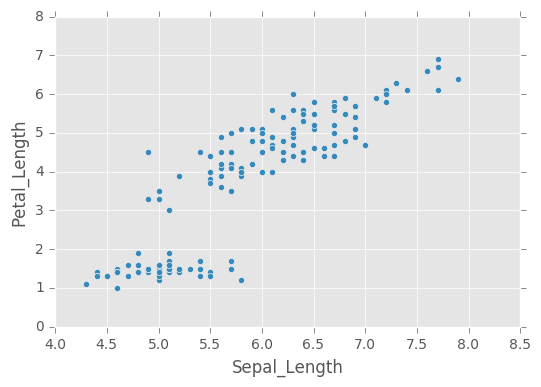

In [4]:
x.plot(kind='scatter',x='Sepal_Length',y='Petal_Length')

I spy 2 very distinct clusters.
![2 clusters](images/2 cluster.png)

I spy 4 somewhat distinct clusters.  2 which are dense and 2 which are not so dense or populous.
![4 cluster](images/4 cluster.png)


I Spy 5 ways to draw straight (non-horizontal lines) to divide our data into 6 more specific clusters.
![5 split](images/6 cluster.png)


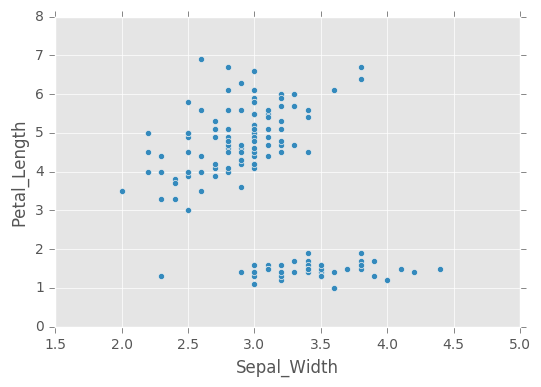

In [5]:
x.plot(kind='scatter',x='Sepal_Width',y='Petal_Length')

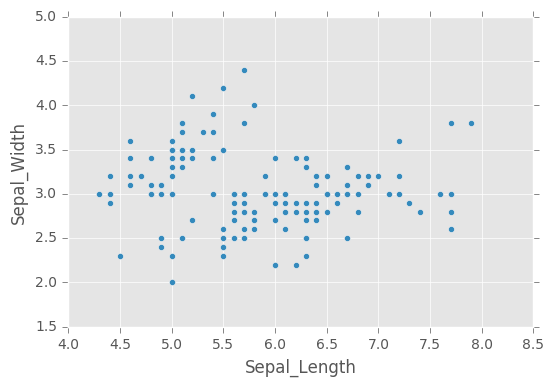

In [6]:
x.plot(kind='scatter',x='Sepal_Length',y='Sepal_Width')

## Step 3: Cluster the data

#### Run the cluster analysis 

In [7]:
# We'll just cheat and provide k = 3
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(x)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#### Compute the labels and centroids

In [8]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

## Step 4: Evaluate the clusters

#### Check the predicted vs actual classifcations

In [9]:
colormap = np.array(['red', 'blue', 'yellow'])

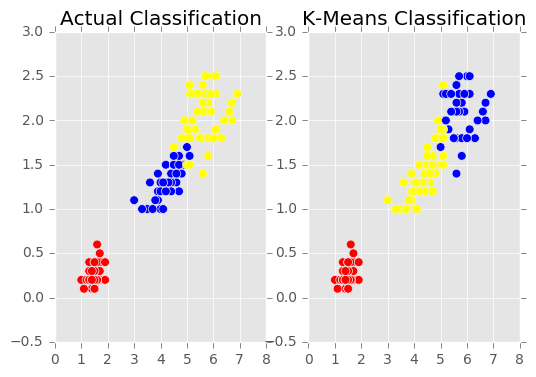

In [10]:
colormap = np.array(['red', 'blue', 'yellow'])

plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Actual Classification')
 
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[labels], s=40)
plt.title('K-Means Classification')

#### Check the centroids

In [11]:
print(centroids)

[[ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.9016129   2.7483871   4.39354839  1.43387097]]


#### Check the labels

In [12]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [13]:
predY = np.choose(labels, [1, 0, 2]).astype(np.int64)

#### Accuracy Score

In [14]:
metrics.accuracy_score(y, predY)

0.093333333333333338

#### Compute the Silhoutte Score

In [15]:
metrics.silhouette_score(y, predY, metric='euclidean')

0.70172421600536772

Accuracy score is bad, but the Silhouette is good. Hmm... I wonder why that is?

Lets looks at the confusion matrix to see how things are being clusterd/ classified

#### Calculate the Precision, Recall, and F - Score

In [25]:
print(metrics.classification_report(y, predY))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.00      0.00      0.00        50
          2       0.23      0.28      0.25        50

avg / total       0.08      0.09      0.08       150



Precision, Recall and F-Score are also pretty bad.

#### Check the Confusion Matrix

In [17]:
print(metrics.confusion_matrix(y, predY))

[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


true positives are only 14, but we can also see that our cluster is able to draw two very homogenous clusters and 1 complete cluster, however it just seems to be labelling things differently that what we would like it to be.

Likes check those Homogeneity, Completeness and V_Measure.

In [23]:
from sklearn.metrics import homogeneity_completeness_v_measure

ytrue= y.Targets

homogeneity_completeness_v_measure(ytrue, predY)

(0.75148540219883375, 0.76498615144898152, 0.7581756800057784)